# <center>Simple Linear Regression</center>


## About this Notebook
In this notebook, we learn how to use `scikit-learn` to implement simple linear regression using dataset that is related to Fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate your model using test set, and finally use model to predict unknown value.

**`FuelConsumptionCo2.csv`** contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


- Supervised Learning:
    - Classification
    - **Regression**
    
## Practice

### 1. Import libraries and load dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Fuel_Consume = pd.read_csv("FuelConsumptionCo2.csv")
Fuel_Consume.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### 2. Sanity check

In [3]:
Fuel_Consume.shape

(1067, 13)

In [4]:
Fuel_Consume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
Fuel_Consume.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
Fuel_Consume.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [7]:
Fuel_Consume.memory_usage().sum() # Unit is byte

111096

In [8]:
Fuel_Consume[["MAKE","MODEL"]].describe()

,MAKE,MODEL
count,1067,1067
unique,39,663
top,FORD,F150 FFV
freq,90,8


### 3. Exploratory Data Analysis

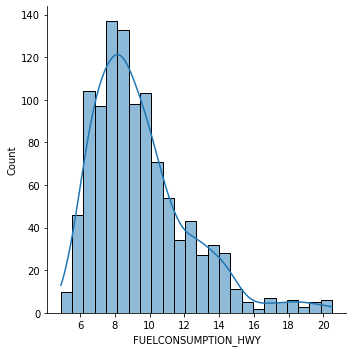

In [9]:
sns.displot(data=Fuel_Consume, x="FUELCONSUMPTION_HWY", kde=True)

<AxesSubplot:xlabel='ENGINESIZE'>

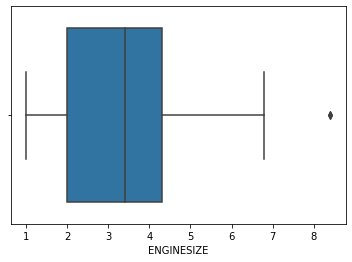

In [10]:
sns.boxplot(data=Fuel_Consume, x="ENGINESIZE")

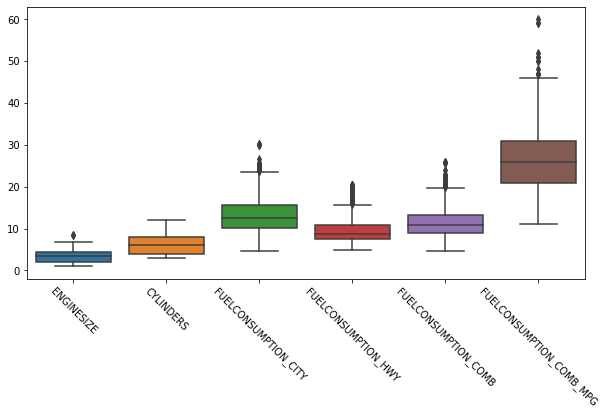

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(data=Fuel_Consume.drop(columns=["MODELYEAR","CO2EMISSIONS"]))
plt.xticks(rotation=-45)
plt.show()

### 4. Feature selection

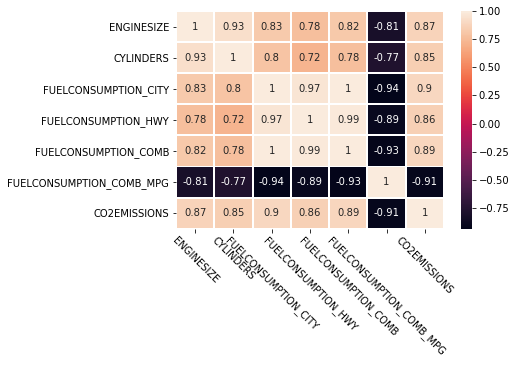

In [12]:
corr = Fuel_Consume.drop(columns="MODELYEAR").corr()
sns.heatmap(data= corr, linewidths=1, annot=True)
plt.xticks(rotation=-45)
plt.show()

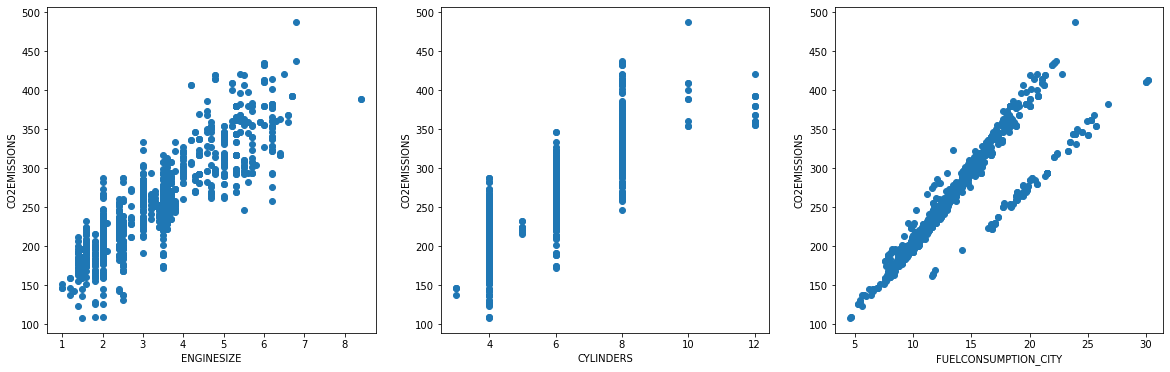

In [13]:
fig, ax = plt.subplots(1,3, figsize=(20,6))
ax[0].scatter(Fuel_Consume["ENGINESIZE"], Fuel_Consume["CO2EMISSIONS"])
ax[0].set(xlabel='ENGINESIZE', ylabel='CO2EMISSIONS')

ax[1].scatter(Fuel_Consume.CYLINDERS, Fuel_Consume.CO2EMISSIONS)
ax[1].set(xlabel='CYLINDERS', ylabel='CO2EMISSIONS')

ax[2].scatter(Fuel_Consume.FUELCONSUMPTION_CITY, Fuel_Consume.CO2EMISSIONS)
ax[2].set(xlabel='FUELCONSUMPTION_CITY', ylabel='CO2EMISSIONS')

plt.show()


### 5. Train model

In [14]:
Fuel_Consume.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()
model.fit(Fuel_Consume[["ENGINESIZE"]], Fuel_Consume["CO2EMISSIONS"])

LinearRegression()

In [17]:
model.coef_

array([39.12519979])

In [18]:
model.intercept_ 

125.30409949535684

### => CO2EMISSIONS = 39.125*ENGINESIZE + 125.3

In [19]:
Co2_predict = model.predict(Fuel_Consume[["ENGINESIZE"]])
Co2_predict

array([203.55449907, 219.20457898, 183.99189918, ..., 242.67969886,
       250.50473881, 250.50473881])

In [20]:
prediction_test = model.coef_[0]*Fuel_Consume["ENGINESIZE"] + model.intercept_
prediction_test

0       203.554499
1       219.204579
2       183.991899
3       262.242299
4       262.242299
           ...    
1062    242.679699
1063    250.504739
1064    242.679699
1065    250.504739
1066    250.504739
Name: ENGINESIZE, Length: 1067, dtype: float64

In [21]:
pd.DataFrame({"Co2_Predict":Co2_predict, "Prediction_test":prediction_test}).head()

,Co2_Predict,Prediction_test
0,203.554499,203.554499
1,219.204579,219.204579
2,183.991899,183.991899
3,262.242299,262.242299
4,262.242299,262.242299


# 6. Evaluation method

![](https://algotrading101.com/learn/wp-content/uploads/2020/06/training-validation-test-data-set.png)

![](https://i.ytimg.com/vi/fKz-SgScM3Q/maxresdefault.jpg)